In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

y = [1], it's a 'cat' picture.


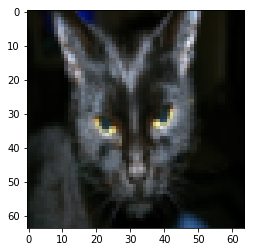

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [3]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [4]:
train_set_x_flatten = train_set_x_orig.reshape(num_px*num_px*3, m_train)
test_set_x_flatten = test_set_x_orig.reshape(num_px*num_px*3, m_test)
 
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))


train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


In [5]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

print("sanity check after reshaping: " + str(train_set_x[:5,0]))

sanity check after reshaping: [0.06666667 0.27843137 0.19215686 0.14901961 0.2745098 ]


In [6]:
# GRADED FUNCTION: sigmoid
def sigmoid(z):
    """
    Compute the sigmoid of z
 
    Arguments:
    z -- A scalar or numpy array of any size.
 
    Return:
    s -- sigmoid(z)
    """
    s = 1/(1+(1/np.exp(z)))
    return s

In [7]:
#check the outcome -> expected = "sigmoid([0, 2]) = [ 0.5 0.88079708]"
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [8]:
# GRADED FUNCTION: initialize_with_zeros
 
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
 
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
 
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
 
    w = np.zeros((dim, 1))
    b = 0
 
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
 
    return w, b


In [9]:
#Check the code

#Expected Output
#w = [[ 0.][ 0.]] b = 0 

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))


w = [[0.]
 [0.]]
b = 0


In [10]:
# GRADED FUNCTION: propagate
 
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above
 
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)
 
    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
 
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
 
    m = X.shape[1]
 
    # compute activation
    A = sigmoid(np.dot(np.transpose(w),X) + b)
    # compute cost
    sum_1 = 0
    sum_2 = 0
    for i in range(m):
        sum_1+=Y[:,i]*np.log(A[:,i]) + np.log(1-A[:,i])*(1-Y[:,i])
        sum_2+=A[:,i]-Y[:,i]
    cost = -sum_1/m
 
    # BACKWARD PROPAGATION (TO FIND GRAD)
    sum_tmp = 0
    for i in range(m):
        sum_tmp+=A[:,i]*Y[:,i]
    db = sum_2/m
    dw = np.dot(X,np.transpose(A-Y))/m
    
    assert(db.dtype == float)
    assert(dw.shape == w.shape)
 
    cost = np.squeeze(cost)
    assert(cost.shape == ())
 
    grads = {"dw": dw,
             "db": db}
 
    return grads, cost


In [11]:
#Check the function:

#Expected outcome: dw = [[ 0.99993216][ 1.99980262]]    db = 0.499935230625    cost = 6.00006477319

w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))
print ("w = " + str(w))


dw = [[0.99993216]
 [1.99980262]]
db = [0.49993523]
cost = 6.000064773192205
w = [[1]
 [2]]


In [12]:
# GRADED FUNCTION: optimize
 
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
 
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
 
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
 
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
 
    costs = []
 
    for i in range(num_iterations):
 
 
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
 
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
 
        # update rule 
        w = w - learning_rate*dw
        b = b - learning_rate*db
 
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
 
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
 
    params = {"w": w,
              "b": b}
 
    grads = {"dw": dw,
             "db": db}
 
    return params, grads, costs

In [13]:
#Check the code

#expected outcome: w = [[ 0.1124579 ] [ 0.23106775]]  b = 1.55930492484
#dw = [[ 0.90158428] [ 1.76250842]] db = 0.430462071679

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
 
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))


w = [[0.1124579 ]
 [0.23106775]]
b = [1.55930492]
dw = [[0.90158428]
 [1.76250842]]
db = [0.43046207]


In [14]:
# GRADED FUNCTION: predict
 
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(np.transpose(w),X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[:,i] <= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
        
    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [15]:
#check

#expected: predictions = [[ 1.  1.]]

print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [18]:
# GRADED FUNCTION: model
 
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
 
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
 
    Returns:
    d -- dictionary containing information about the model.
    """

    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
 
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)
 
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
 
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
 
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
 
 
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
 
    return d


In [19]:
#train the model

#outcome: train accuracy: 99.04306220095694 % test accuracy: 70.0 %

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


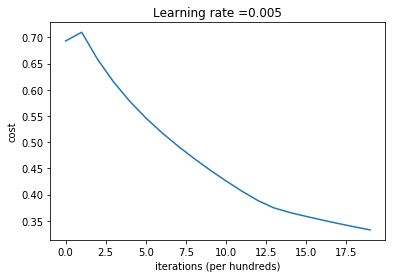

In [20]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()
